In [2]:
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.datasets import make_moons, make_blobs
from IPython.display import HTML #we need this for displaying an animation when using an .ipynb file

In [3]:
import candle.nn as nn
import candle.losses as losses
import candle.helpers as helpers
from candle.engine import Scalar, Vector

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [4]:
random.seed(42)

First, we will download and visualize a dataset. 

First five X values:
 [[-0.93356293  0.48623474]
 [ 0.91412108  0.68590197]
 [-0.82351031  0.50745886]
 [ 1.26306707 -0.6460133 ]
 [ 0.18577421  0.95718228]]

First five y values:
 [-1 -1 -1  1 -1]


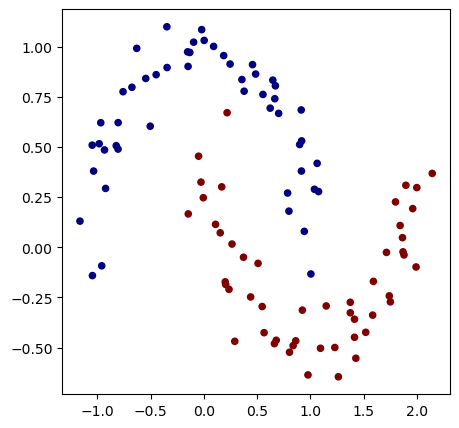

In [5]:
# First, we will download and visualize a dataset in 2D
X, y = make_moons(n_samples=100, noise=0.1)
y = y*2 - 1     # make y be -1 or 1 (instead of 0 or 1)
print(f"First five X values:\n {X[:5]}\n")
print(f"First five y values:\n {y[:5]}")
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

Now, we will instantiate the model and the training data using PyCandle. 

In [6]:
model = nn.MLP(2, [16, 16, 1], activ='tanh') # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

Xs = [Vector(x) for x in X]
ys = Vector(y)

number of parameters 337


In [7]:
model.parameters()

[Scalar(data=0.2788535969157675, grad=0.0, label=L0w0-\>L1w0),
 Scalar(data=-0.9499784895546661, grad=0.0, label=L0w1-\>L1w0),
 Scalar(data=-0.4499413632617615, grad=0.0, label=L1b0),
 Scalar(data=-0.5535785237023545, grad=0.0, label=L0w0-\>L1w1),
 Scalar(data=0.4729424283280248, grad=0.0, label=L0w1-\>L1w1),
 Scalar(data=0.3533989748458226, grad=0.0, label=L1b1),
 Scalar(data=0.7843591354096908, grad=0.0, label=L0w0-\>L1w2),
 Scalar(data=-0.8261223347411677, grad=0.0, label=L0w1-\>L1w2),
 Scalar(data=-0.15615636062945915, grad=0.0, label=L1b2),
 Scalar(data=-0.9404055611238593, grad=0.0, label=L0w0-\>L1w3),
 Scalar(data=-0.5627240503927933, grad=0.0, label=L0w1-\>L1w3),
 Scalar(data=0.010710576206724776, grad=0.0, label=L1b3),
 Scalar(data=-0.9469280606322728, grad=0.0, label=L0w0-\>L1w4),
 Scalar(data=-0.602324698626703, grad=0.0, label=L0w1-\>L1w4),
 Scalar(data=0.2997688755590464, grad=0.0, label=L1b4),
 Scalar(data=0.08988296120643335, grad=0.0, label=L0w0-\>L1w5),
 Scalar(data=-0

We also need to define some information for plotting predicted contours later on

In [8]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [Vector(xrow) for xrow in Xmesh]
Zs = []

Let's train!

In [9]:
for epoch in range(50):

    # Forward pass
    model.zero_grad()
    y_preds = list(map(model, Xs))
    loss = losses.mean_squared_error(ys, y_preds)

    # Back propagation
    loss.backward()

    # Gradient descent (using the entire training set)
    learning_rate = 1.0 - 0.9*epoch/100 # 
    for p in model.parameters():
        p.data += -learning_rate * p.grad
    print(epoch, loss.data)

    # Calculating predicted contour
    scores = list(map(model, inputs))
    Z = np.array([s.data > 0 for s in scores])
    Z = Z.reshape(xx.shape)
    Zs.append(Z)


0 1.479820180354358
1 1.1177277902130065
2 0.9158781870468055
3 0.8659604225236409
4 0.869660528437322
5 0.8648923368042155
6 0.8472559190794491
7 0.8097640420234865
8 0.7655157863703694
9 0.7261549252041597
10 0.6230164632999294
11 0.5500471139590317
12 0.5278931853128993
13 0.5176383967149234
14 0.5028880550290904
15 0.49399059322480887
16 0.48779991908083276
17 0.4800834086696476
18 0.4743204763721325
19 0.4676601280736551
20 0.45954185075975174
21 0.45127966335908215
22 0.44385801874025405
23 0.43644572811571813
24 0.4262653033558928
25 0.38957024329850287
26 0.2524078024842926
27 0.39410663495332976
28 0.3392712667485089
29 0.2272455143552557
30 0.358485521891996
31 0.26619654047814
32 0.1439657832731888
33 0.1308848443669497
34 0.12878455269640632
35 0.17503329859457306
36 0.14626224161414375
37 0.24440239283764556
38 0.10387902836208548
39 0.0792352665131106
40 0.07369018968504433
41 0.06975418135393746
42 0.06638213761265804
43 0.06536958572497328
44 0.0625688061909788
45 0.063

Since we stored predictions of a background meshgrid for each epoch during training (`Zs`), we can visualize how the model learned over time.

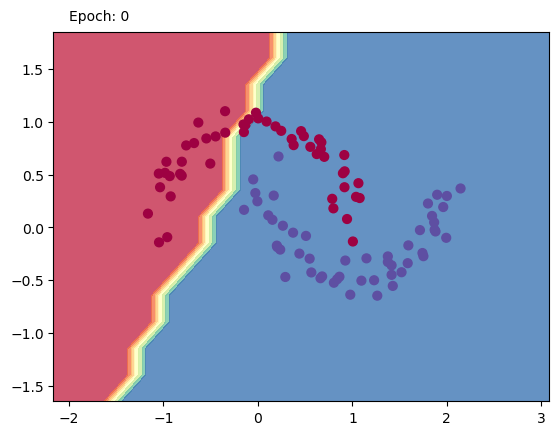

In [10]:
fig, ax = plt.subplots()
cf = ax.contourf(xx, yy, Zs[0], cmap=plt.cm.Spectral, alpha=0.8)
sct = ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
txt = ax.text(-2.0,2.0, f"Epoch: 0", va='center')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 

def animate(i):
    global cf
    for coll in cf.collections:
        coll.remove()
    Z = Zs[i]
    cf = ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    sct = ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    txt.set_text(f"Epoch: {i}")   

    return cf

anim = animation.FuncAnimation(fig, animate, frames=len(Zs), repeat=False)

plt.show()
HTML(anim.to_html5_video())